# Group Project ML: Dijkstra

## Adult income dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, etc.

### Getting the raw data

In [1]:
import pandas as pd
df=pd.read_csv('adult.csv') #Read raw data

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#select numerical columns
num_cols = df.select_dtypes(include=np.number).columns 

### Understanding data types

In [4]:
df.info() #see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Understanding how our data is distributed

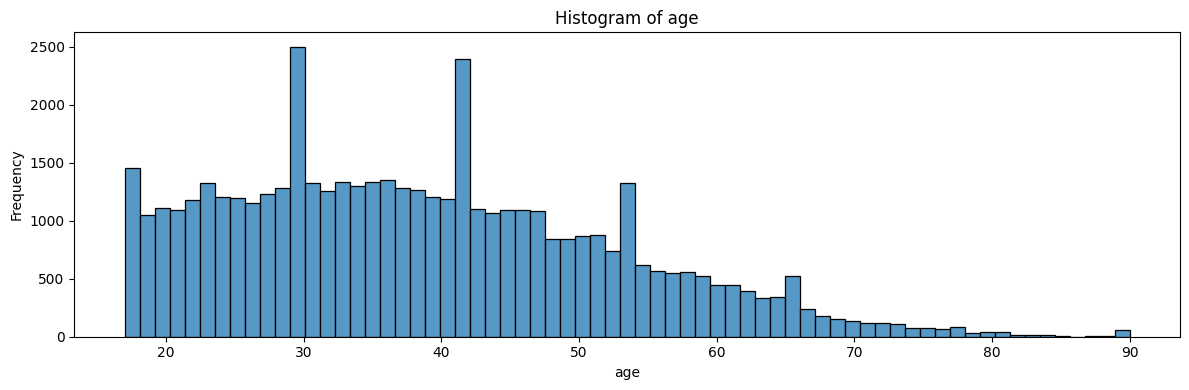

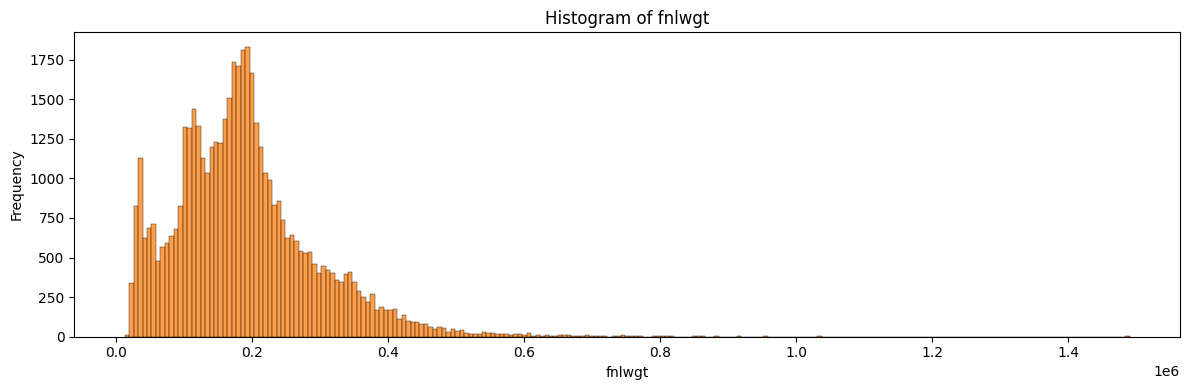

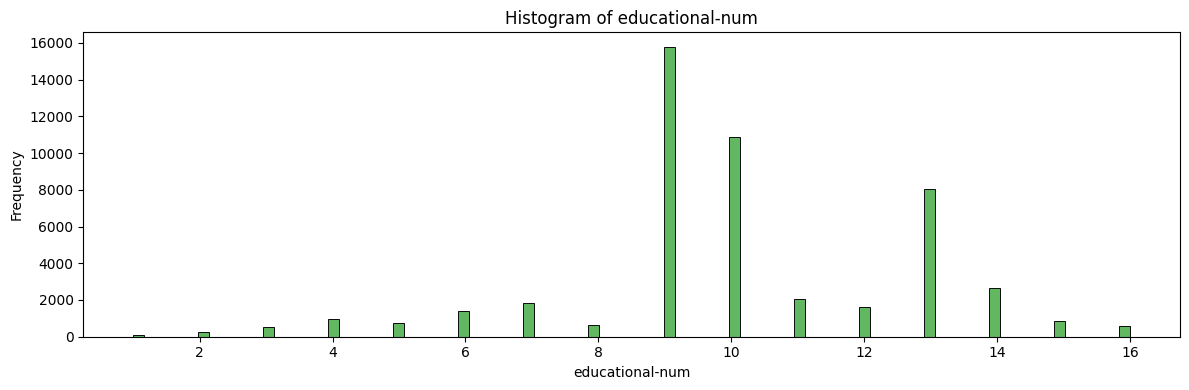

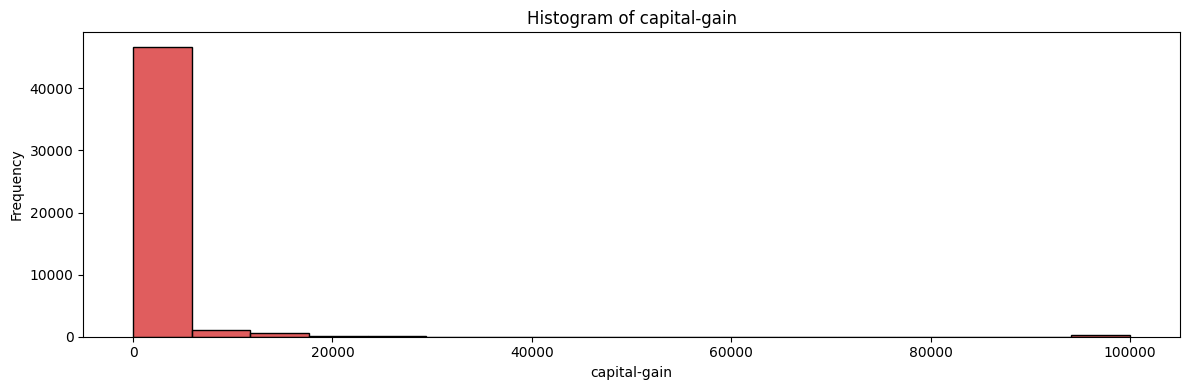

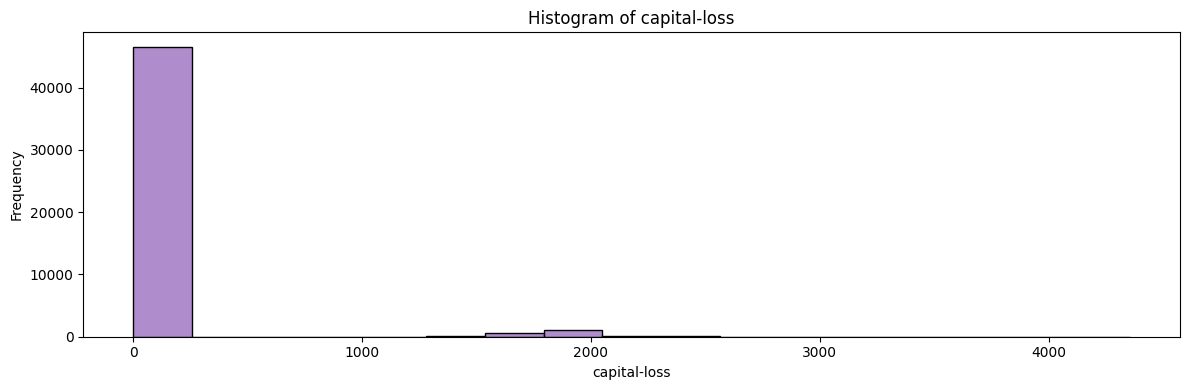

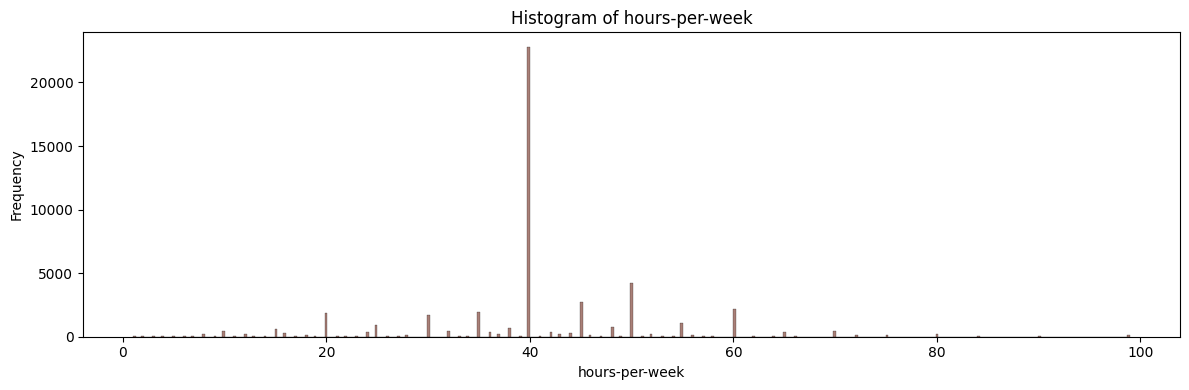

In [5]:
for i, col in enumerate(num_cols):
    plt.figure(figsize=(12, 4))  # Adjust the figure size if needed
    sns.histplot(df[col], color=sns.color_palette()[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Plot columns histograms, grouping by target variable (income)

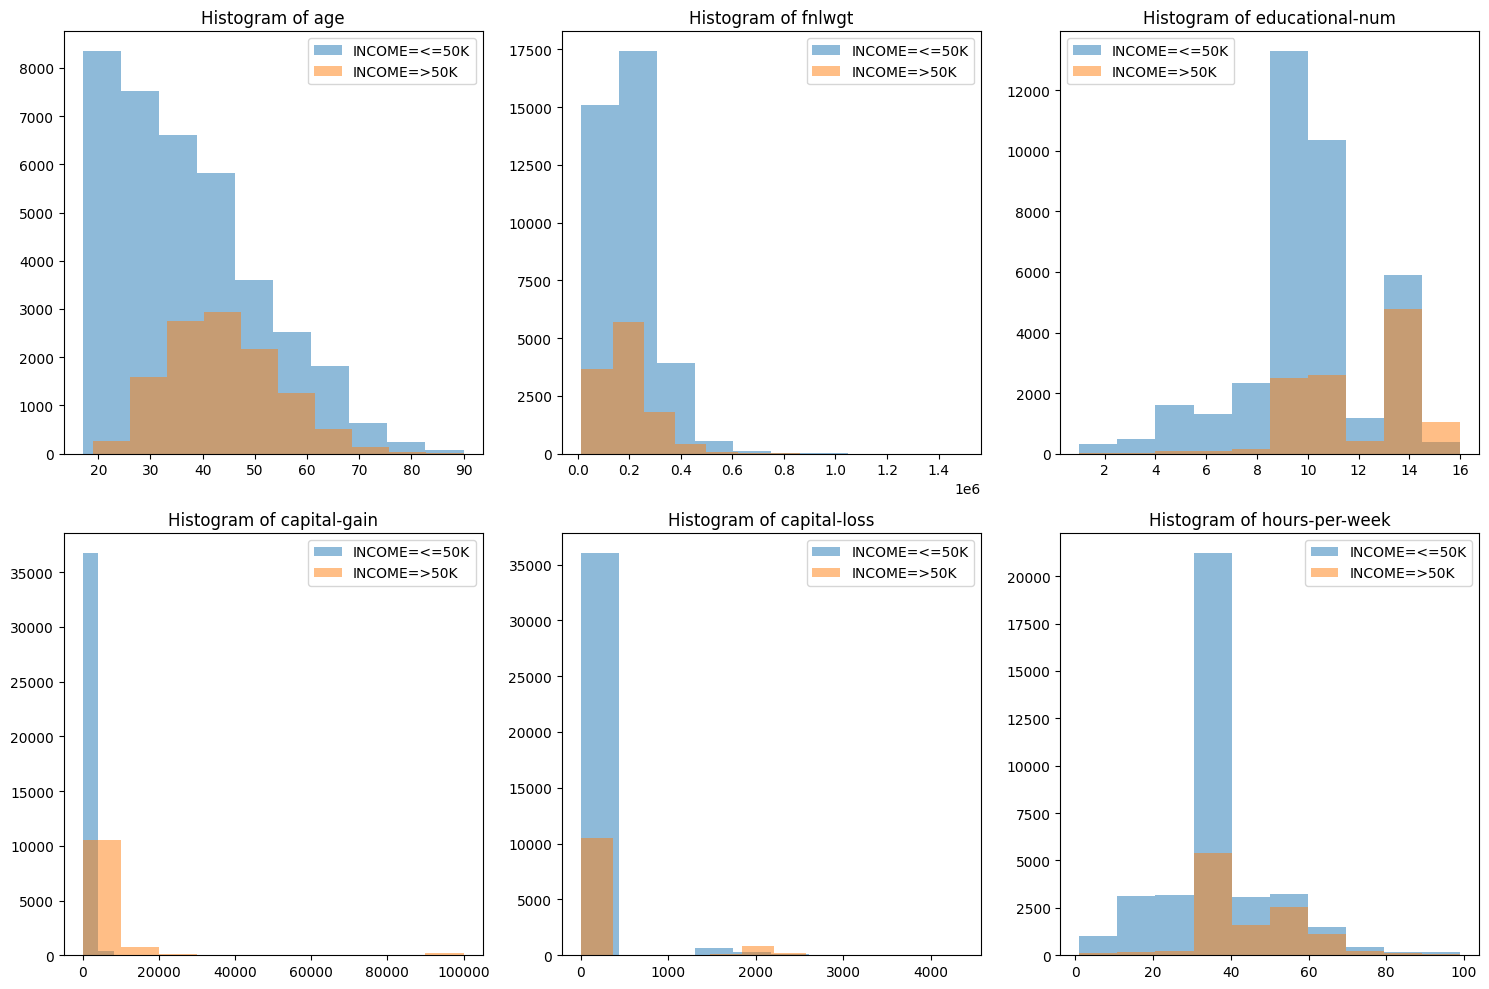

In [6]:
grouped = df.groupby('income')

#Get the list of numerical features
numerical_features = df.select_dtypes(exclude=['O']).columns

#Calculate the number of rows and columns for the subplots
n = len(numerical_features)
ncols = 3 #Height -> y axis
nrows = n // ncols if n % ncols == 0 else n // ncols + 1 #X axis

#Create a new figure for the subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

#Flatten the axes array
axs = axs.flatten()

#Iterate over each numerical feature
for i, feature in enumerate(numerical_features):  # Iterate over each group and plot the histogram on the corresponding subplot
    
    # Add a title and a legend to each subplot
    axs[i].set_title(f'Histogram of {feature}')
    for name, group in grouped:
        axs[i].hist(group[feature], alpha=0.5, label=f'INCOME={name}')
    axs[i].legend()
        
#Remove extra subplots
for i in range(n, nrows*ncols):
        fig.delaxes(axs[i])

#Display the plot
plt.tight_layout()
plt.show()


### Plot correlation matrix to understand the relationship between numerical variables

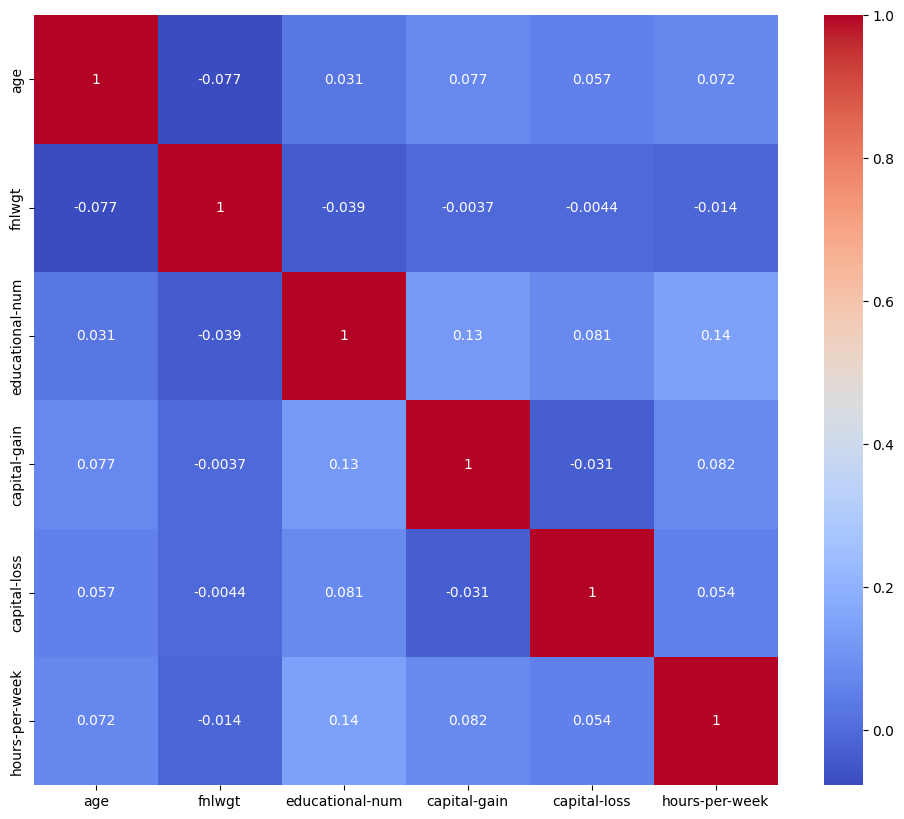

In [7]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Drop columns we won't use

In [8]:
#DROP COLUMNS
df.drop('capital-loss',inplace=True,axis=1)
df.drop('capital-gain',inplace=True,axis=1)
df.drop('fnlwgt',inplace=True,axis=1)

In [15]:
df.head()

,age,workclass,educational level,years of studying,marital status,occupation,relationship,race,gender,working hours per week,country of origin,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,0


### Checking all unique values inside every column to make sure the data is clean

In [59]:
column_names = []
column_names = df.columns

for v in column_names:
    d[v]= df[v].unique()

print(d)

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86]), 'workclass': array(['Private', 'Local-gov', 'Unknown', 'Self-emp-not-inc',
       'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object), 'educational level': array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object), 'years of studying': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1]), 'marital status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Marri

### Replace Values

In [33]:
#Replace  values
df['income'] = df['income'].replace({'>50K': 1, '<=50K': 0})
df['workclass'] = df['workclass'].replace({'?': 'Unknown'})
df['occupation'] = df['occupation'].replace({'?': 'Unknown'})


In [21]:
df.head()

,age,workclass,educational level,years of studying,marital status,occupation,relationship,race,gender,working hours per week,country of origin,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,United-States,0


### Redefining Column Names

In [22]:
df.columns=["age","workclass","educational level","years of studying","marital status","occupation","relationship","race","gender","working hours per week", "country of origin","income"]
df

,age,workclass,educational level,years of studying,marital status,occupation,relationship,race,gender,working hours per week,country of origin,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


### Get statistics for the numerical values

In [23]:
numerical_values=["age","years of studying","working hours per week"]
statistics_for_numerical=df[numerical_values].describe()
statistics_for_numerical

,age,years of studying,working hours per week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,40.422382
std,13.710510,2.570973,12.391444
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


### Saving the clean data to a new csv file

In [24]:
df.to_csv('cleaned_data_set.csv',index=False)